# **АНАЛІЗ ДАНИХ**

## Встановлення потрібних бібліотек

In [5]:
import pandas as pd
import numpy as np

from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Зчитування та аналіз набору даних

In [7]:
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.shape

(958524, 45)

In [6]:
print('columns count - ',len(df.columns), '\n')
print('columns: ',list(df.columns))

columns count -  45 

columns:  ['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H', 'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class', 'rms']


| #  | Column            | Description                                                                                               |
|----|--------------------|-----------------------------------------------------------------------------------------------------------|
| 1  | **id**            | Унікальний ідентифікатор об’єкта.                                                                         |
| 2  | **spkid**         | Числовий ідентифікатор об’єкта в базі даних NASA.                                                         |
| 3  | **full_name**     | Повна назва об’єкта, яка часто містить його номер і рік відкриття.                                        |
| 4  | **pdes**          | Первинне позначення об'єкта, що зазвичай включає рік відкриття та додаткові символи.                      |
| 5  | **name**          | Офіційне ім'я об'єкта, якщо воно присвоєне.                                                               |
| 6  | **prefix**        | Префікс, що позначає особливості відкриття, часто порожній.                                               |
| 7  | **neo**           | Ознака, чи є об'єкт "near-Earth object" (NEO).                                                            |
| 8  | **pha**           | Ознака потенційної небезпеки (Potentially Hazardous Asteroid).                                            |
| 9  | **H**             | Абсолютна зоряна величина об'єкта (показує його яскравість).                                              |
| 10 | **diameter**      | Діаметр об'єкта в кілометрах.                                                                            |
| 11 | **albedo**        | Альбедо або відбивна здатність поверхні об'єкта.                                                          |
| 12 | **diameter_sigma**| Похибка діаметра.                                                                                        |
| 13 | **orbit_id**      | Ідентифікатор орбіти, що визначає поточний розрахунок орбіти.                                            |
| 14 | **epoch**         | Часовий параметр епохи, для якої обчислена орбіта.                                                       |
| 15 | **epoch_mjd**     | Епоха в модифікованих юліанських днях (Modified Julian Date).                                            |
| 16 | **epoch_cal**     | Епоха в календарній формі.                                                                               |
| 17 | **equinox**       | Рівнодення для обчислень орбіти.                                                                         |
| 18 | **e**             | Ексцентриситет орбіти, який показує, наскільки орбіта відрізняється від кола.                            |
| 19 | **a**             | Велика піввісь орбіти (в астрономічних одиницях, а.о.).                                                  |
| 20 | **q**             | Перигелій орбіти (найближча точка до Сонця).                                                             |
| 21 | **i**             | Нахил орбіти об’єкта відносно екліптики (в градусах).                                                   |
| 22 | **om**            | Довгота висхідного вузла, де орбіта перетинає екліптику.                                                |
| 23 | **w**             | Аргумент перигелію, який описує орієнтацію орбіти в площині.                                            |
| 24 | **ma**            | Середня аномалія, що визначає положення об'єкта на орбіті в певний момент.                               |
| 25 | **ad**            | Афелій орбіти (найдальша точка від Сонця).                                                               |
| 26 | **n**             | Середня швидкість руху об’єкта орбітою.                                                                 |
| 27 | **tp**            | Час проходження через перигелій.                                                                         |
| 28 | **tp_cal**        | Час проходження через перигелій у календарній формі.                                                    |
| 29 | **per**           | Орбітальний період (тривалість одного повного оберту навколо Сонця).                                     |
| 30 | **per_y**         | Орбітальний період у роках.                                                                             |
| 31 | **moid**          | Мінімальна відстань між орбітами Землі та об'єкта.                                                      |
| 32 | **moid_ld**       | Мінімальна відстань між орбітами об'єкта та Землі у відстанях до Місяця.                                 |
| 33 | **sigma_e**       | Стандартне відхилення ексцентриситету.                                                                   |
| 34 | **sigma_a**       | Стандартне відхилення великої піввісі.                                                                  |
| 35 | **sigma_q**       | Стандартне відхилення перигелію.                                                                        |
| 36 | **sigma_i**       | Стандартне відхилення нахилу орбіти.                                                                    |
| 37 | **sigma_om**      | Стандартне відхилення довготи висхідного вузла.                                                         |
| 38 | **sigma_w**       | Стандартне відхилення аргументу перигелію.                                                              |
| 39 | **sigma_ma**      | Стандартне відхилення середньої аномалії.                                                               |
| 40 | **sigma_ad**      | Стандартне відхилення афелію.                                                                           |
| 41 | **sigma_n**       | Стандартне відхилення середньої швидкості руху по орбіті.                                               |
| 42 | **sigma_tp**      | Стандартне відхилення часу проходження через перигелій.                                                 |
| 43 | **sigma_per**     | Стандартне відхилення орбітального періоду.                                                             |
| 44 | **class**         | Класифікація об’єкта за типом орбіти (наприклад, MBA — Main Belt Asteroid).                              |
| 45 | **rms**           | Середньоквадратичне відхилення у точності обчислень орбіти.                                             |


###  Зменшення розміру датасету до 2 000 записів

In [8]:
# 1. Вибір рядків без жодного пропуску, але ігноруючи стовпець 'prefix'
complete_rows = df.dropna(subset=[col for col in df.columns if col != 'prefix'])

# Вибір значної частини з повних рядків (наприклад, 1700 рядків)
# Якщо менше 1500 повних рядків, вибираємо доступну кількість
n_complete = min(1700, len(complete_rows))
sample_complete = complete_rows.sample(n=n_complete, random_state=42)

# 2. Вибір рядків з невеликою кількістю пропусків (до 5 пропусків у всьому рядку)
max_missing = 25  # Дозволяємо до 5 пропусків
almost_complete_rows = df[df.isnull().sum(axis=1) <= max_missing]

# Відфільтруємо рядки, які вже були обрані як повні, щоб уникнути повторень
almost_complete_rows = almost_complete_rows.drop(sample_complete.index, errors='ignore')

# Вибір додаткових рядків з пропусками
n_almost_complete = min(2000 - n_complete, len(almost_complete_rows))
sample_almost_complete = almost_complete_rows.sample(n=n_almost_complete, random_state=42)

# 3. Об’єднуємо дві вибірки, що містять 1700 повних і 300 майже повних рядків
final_sample = pd.concat([sample_complete, sample_almost_complete]).drop_duplicates()

# Збереження відібраних даних
final_sample.to_csv("filtered_dataset.csv", index=False)

In [89]:
print(df_reduced.shape)

(2000, 45)


In [9]:
df = final_sample

### Перевірка наявності пропущених даних

In [91]:
print("Any missing sample in training set:", df.isnull().values.any())

Any missing sample in training set: True


In [92]:
for col in df.columns:
    if df[col].isnull().values.any():
        print("Missing data in ", col)

Missing data in  name
Missing data in  prefix
Missing data in  pha
Missing data in  H
Missing data in  diameter
Missing data in  albedo
Missing data in  diameter_sigma
Missing data in  moid
Missing data in  sigma_e
Missing data in  sigma_a
Missing data in  sigma_q
Missing data in  sigma_i
Missing data in  sigma_om
Missing data in  sigma_w
Missing data in  sigma_ma
Missing data in  sigma_ad
Missing data in  sigma_n
Missing data in  sigma_tp
Missing data in  sigma_per


In [93]:
missing = list()
for x in final_sample.columns:
    if final_sample[x].isnull().sum() != 0:
        print(x, final_sample[x].isnull().sum())
        missing.append(x)

name 290
prefix 2000
pha 6
H 2
diameter 246
albedo 247
diameter_sigma 246
moid 6
sigma_e 6
sigma_a 6
sigma_q 6
sigma_i 6
sigma_om 6
sigma_w 6
sigma_ma 6
sigma_ad 6
sigma_n 6
sigma_tp 6
sigma_per 6


### Підрахунок унікальних значень у кожному стовпці

In [94]:
df.nunique()

id                2000
spkid             2000
full_name         2000
pdes              2000
name              1710
prefix               0
neo                  2
pha                  2
H                  172
diameter          1650
albedo             473
diameter_sigma     727
orbit_id           129
epoch               19
epoch_mjd           19
epoch_cal           19
equinox              1
e                 2000
a                 2000
q                 2000
i                 2000
om                2000
w                 2000
ma                2000
ad                2000
n                 2000
tp                2000
tp_cal            2000
per               2000
per_y             2000
moid              1983
moid_ld           1984
sigma_e           1947
sigma_a           1955
sigma_q           1920
sigma_i           1934
sigma_om          1977
sigma_w           1971
sigma_ma          1946
sigma_ad          1946
sigma_n           1839
sigma_tp          1972
sigma_per         1968
class      

### Описова статистика

In [95]:
df.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,2.000000e+03,1998.000000,1754.000000,1753.000000,1754.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,...,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,2000.000000
mean,2.321909e+06,13.870700,13.211319,0.191187,0.464820,2.458968e+06,58967.971000,2.019965e+07,0.140176,2.746393,...,1.690119e-02,2.007996e-02,9.802875e-02,4.103544e+00,4.189846,1.295898e-02,1.527404e-03,15.448868,9.874329,0.498894
std,3.090022e+06,2.078454,26.001890,0.130692,1.237902,3.616132e+02,361.613208,1.001393e+04,0.072654,1.370858,...,4.438102e-01,4.271782e-01,2.252885e+00,1.354591e+02,131.343155,3.485460e-01,4.294787e-02,535.044306,266.530627,0.070549
min,2.000004e+06,3.000000,1.343000,0.019400,0.013000,2.452534e+06,52533.000000,2.002092e+07,0.001892,0.973945,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,0.000001,1.648600e-09,2.612500e-10,0.000004,0.000001,0.208880
25%,2.004726e+06,12.800000,3.791500,0.071700,0.129000,2.459000e+06,59000.000000,2.020053e+07,0.088248,2.357281,...,8.526250e-08,3.859350e-06,2.337125e-05,3.296925e-05,0.000013,9.334450e-09,1.323200e-09,0.000055,0.000007,0.453863
50%,2.012438e+06,14.000000,6.317500,0.175000,0.223000,2.459000e+06,59000.000000,2.020053e+07,0.133909,2.612568,...,1.055350e-07,4.383100e-06,3.969950e-05,5.077250e-05,0.000019,1.374050e-08,1.500600e-09,0.000083,0.000011,0.497195
75%,2.031296e+06,15.000000,11.897750,0.278000,0.436000,2.459000e+06,59000.000000,2.020053e+07,0.181444,3.005280,...,1.336000e-07,5.290400e-06,7.541550e-05,9.013525e-05,0.000033,2.030100e-08,1.869675e-09,0.000149,0.000017,0.535493
max,5.401596e+07,26.500000,525.400000,1.000000,40.100000,2.459000e+06,59000.000000,2.020053e+07,0.959998,52.966678,...,1.775600e+01,1.487400e+01,7.179700e+01,5.790200e+03,5456.800000,1.430100e+01,1.735700e+00,23429.000000,11064.000000,1.666600


In [10]:
df.describe(include='O') # for categorical variables

,id,full_name,pdes,name,prefix,neo,pha,orbit_id,equinox,class
count,2000,2000,2000,1710,0,2000,1994,2000,2000,2000
unique,2000,2000,2000,1710,0,2,2,129,1,10
top,a0004719,4719 Burnaby (1990 WT2),4719,Burnaby,NaN,N,N,JPL 31,J2000,MBA
freq,1,1,1,1,NaN,1991,1992,100,2000,1841


In [11]:
df.describe(exclude='O') # for numerical variables

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,2.000000e+03,1998.000000,1754.000000,1753.000000,1754.000000,2.000000e+03,2000.000000,2.000000e+03,2000.000000,2000.000000,...,1.994000e+03,1.994000e+03,1.994000e+03,1.994000e+03,1994.000000,1.994000e+03,1.994000e+03,1994.000000,1994.000000,2000.000000
mean,2.321909e+06,13.870700,13.211319,0.191187,0.464820,2.458968e+06,58967.971000,2.019965e+07,0.140176,2.746393,...,1.690119e-02,2.007996e-02,9.802875e-02,4.103544e+00,4.189846,1.295898e-02,1.527404e-03,15.448868,9.874329,0.498894
std,3.090022e+06,2.078454,26.001890,0.130692,1.237902,3.616132e+02,361.613208,1.001393e+04,0.072654,1.370858,...,4.438102e-01,4.271782e-01,2.252885e+00,1.354591e+02,131.343155,3.485460e-01,4.294787e-02,535.044306,266.530627,0.070549
min,2.000004e+06,3.000000,1.343000,0.019400,0.013000,2.452534e+06,52533.000000,2.002092e+07,0.001892,0.973945,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,0.000001,1.648600e-09,2.612500e-10,0.000004,0.000001,0.208880
25%,2.004726e+06,12.800000,3.791500,0.071700,0.129000,2.459000e+06,59000.000000,2.020053e+07,0.088248,2.357281,...,8.526250e-08,3.859350e-06,2.337125e-05,3.296925e-05,0.000013,9.334450e-09,1.323200e-09,0.000055,0.000007,0.453863
50%,2.012438e+06,14.000000,6.317500,0.175000,0.223000,2.459000e+06,59000.000000,2.020053e+07,0.133909,2.612568,...,1.055350e-07,4.383100e-06,3.969950e-05,5.077250e-05,0.000019,1.374050e-08,1.500600e-09,0.000083,0.000011,0.497195
75%,2.031296e+06,15.000000,11.897750,0.278000,0.436000,2.459000e+06,59000.000000,2.020053e+07,0.181444,3.005280,...,1.336000e-07,5.290400e-06,7.541550e-05,9.013525e-05,0.000033,2.030100e-08,1.869675e-09,0.000149,0.000017,0.535493
max,5.401596e+07,26.500000,525.400000,1.000000,40.100000,2.459000e+06,59000.000000,2.020053e+07,0.959998,52.966678,...,1.775600e+01,1.487400e+01,7.179700e+01,5.790200e+03,5456.800000,1.430100e+01,1.735700e+00,23429.000000,11064.000000,1.666600


### Опис типів значень

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 4718 to 576074
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2000 non-null   object 
 1   spkid           2000 non-null   int64  
 2   full_name       2000 non-null   object 
 3   pdes            2000 non-null   object 
 4   name            1710 non-null   object 
 5   prefix          0 non-null      object 
 6   neo             2000 non-null   object 
 7   pha             1994 non-null   object 
 8   H               1998 non-null   float64
 9   diameter        1754 non-null   float64
 10  albedo          1753 non-null   float64
 11  diameter_sigma  1754 non-null   float64
 12  orbit_id        2000 non-null   object 
 13  epoch           2000 non-null   float64
 14  epoch_mjd       2000 non-null   int64  
 15  epoch_cal       2000 non-null   float64
 16  equinox         2000 non-null   object 
 17  e               2000 non-null   f

##  Приклади графіків та діаграм різних типів

### Кореляційна матриця

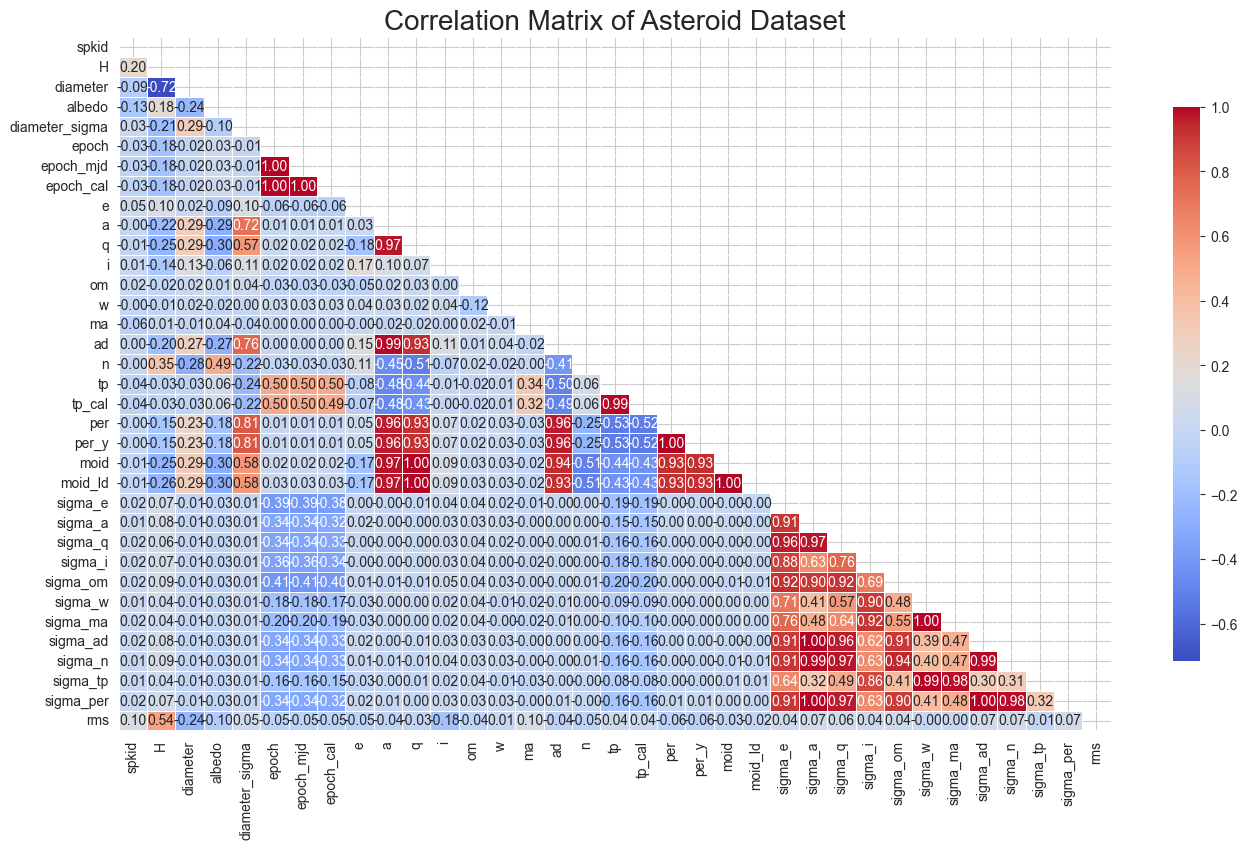

In [14]:
# Вибір числових стовпців
numeric_df = df.select_dtypes(include=[np.number])

# Розрахунок кореляційної матриці для числових стовпців
correlation_matrix = numeric_df.corr()

# Створення маски для верхнього трикутника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Налаштування розміру фігури
plt.figure(figsize=(16, 9))

# Побудова теплової карти
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, annot_kws={"size": 10})

# Заголовок
plt.title("Correlation Matrix of Asteroid Dataset", size=20)
plt.show()

### Аналіз кореляційної матриці астероїдного датасету

Кореляційна матриця показує силу зв'язку між числовими змінними в датасеті. Числові значення в матриці відображають кореляційний коефіцієнт між парами змінних: значення, близькі до +1 або -1, вказують на сильну позитивну або негативну кореляцію, відповідно. Ось основні спостереження:

### Основні спостереження

1. **Висока кореляція між параметрами орбіти**:
   - Спостерігається дуже висока позитивна кореляція між параметрами орбіти астероїда, наприклад, `a` (велика піввісь) та `ad` (апогей). Ці параметри часто фізично пов'язані, тому сильна кореляція очікувана.
   - Значення `per` (період обертання) також має високу кореляцію з параметрами `a` та `ad`, що вказує на зв'язок між великими орбітальними характеристиками і періодом обертання астероїда.

2. **Сильна кореляція між sigma-параметрами**:
   - Багато з `sigma_*` параметрів (що представляють невизначеності вимірювань) мають сильну кореляцію між собою, наприклад, `sigma_e` (невизначеність ексцентриситету) з `sigma_q` (невизначеність перигею).
   - Це може свідчити про те, що невизначеності вимірювань пов'язані з конкретними характеристиками інструментів або методами вимірювань.

3. **Кореляція між діаметром та іншими змінними**:
   - Кореляція діаметра астероїда з іншими змінними відносно низька. Діаметр має слабкий позитивний зв'язок з `H` (абсолютна зоряна величина), але цей зв'язок не є досить сильним для точного передбачення.
   - Відсутність сильних кореляцій з діаметром вказує на те, що діаметр важко передбачити на основі наявних орбітальних параметрів, і можуть знадобитися додаткові характеристики (наприклад, відбивна здатність або склад).

4. **Залежність між параметрами `epoch_mjd`, `epoch_cal`, `tp` та `tp_cal`**:
   - Параметри `epoch_mjd`, `epoch_cal`, `tp`, `tp_cal` мають дуже високу кореляцію один з одним. Це пояснюється тим, що ці параметри, ймовірно, представляють ту саму подію (або дуже близькі події) в різних одиницях виміру або форматах.

### Висновок

Кореляційна матриця показує, що деякі орбітальні параметри та їхні невизначеності мають високий ступінь взаємозв'язку, що очікувано для фізичних характеристик об'єктів. Однак, діаметр астероїда не має сильних кореляцій з іншими числовими змінними, що вказує на обмежені можливості точного передбачення діаметра тільки на основі орбітальних даних. Це може вимагати розширення моделі, включивши інші змінні або додаткові джерела даних.

### Гістограма розподілу діаметра астероїдів

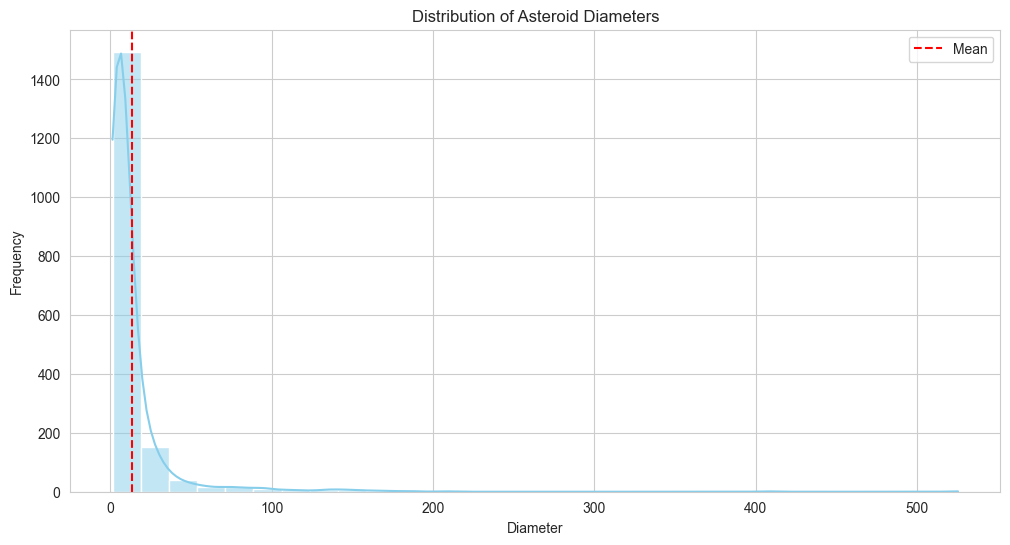

In [12]:

# Налаштування стилю графіка
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Побудова гістограми розподілу діаметра
sns.histplot(df['diameter'], bins=30, kde=True, color='skyblue')
plt.axvline(df['diameter'].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')

# Додавання тексту та легенди
plt.title('Distribution of Asteroid Diameters')
plt.xlabel('Diameter')
plt.ylabel('Frequency')
plt.legend()

# Показ графіка
plt.show()

### Аналіз розподілу діаметрів астероїдів

### Спостереження

1. **Сильна асиметрія**: 
   - Розподіл значень діаметра має сильну асиметрію вправо (правосторонню асиметрію). Більшість астероїдів мають діаметри, що лежать у нижньому діапазоні значень, а великі діаметри зустрічаються рідко.

2. **Велика концентрація малих значень**: 
   - Більшість значень діаметра зосереджено близько до нуля, і дуже мало значень перевищують 100 одиниць.

3. **Наявність викидів**: 
   - Є кілька значень діаметра значно більше середнього (позначеного червоною пунктирною лінією), що є викидами. Ці викиди можуть мати значний вплив на середнє значення.

4. **Середнє значення**:
   - Середнє значення (позначене червоною лінією) розташоване близько до лівої частини розподілу, що підтверджує наявність великої кількості малих значень і рідкісні великі значення.

### Висновок

Більшість астероїдів мають невеликий діаметр, а великі діаметри трапляються рідко, що свідчить про сильну правобічну асиметрію розподілу. Такий розподіл може свідчити про природну тенденцію до більшого утворення дрібних об'єктів у космічному середовищі. 

При подальшому аналізі, зокрема для регресії, можливо, доведеться розглянути логарифмічну трансформацію або видалення викидів, щоб отримати більш симетричний розподіл для моделі.

### Scatter Plot для діаметра та основних характеристик

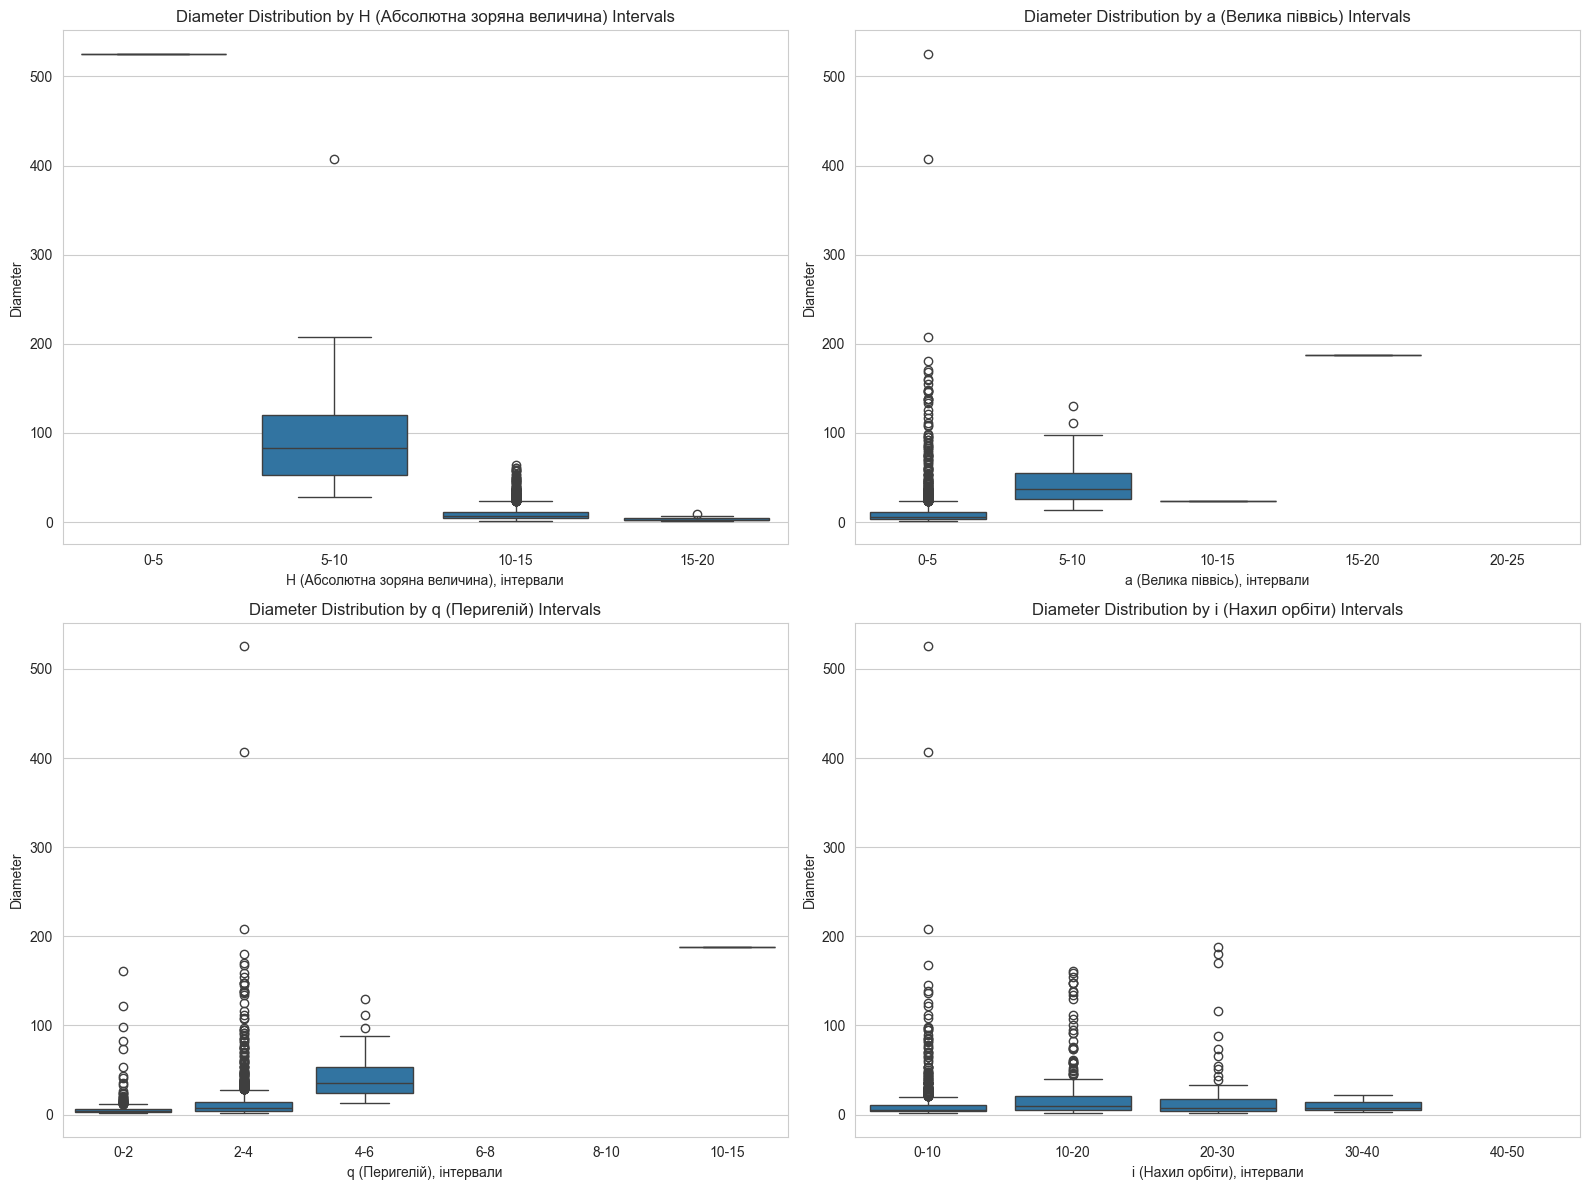

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Створення інтервалів для різних параметрів
df['H_interval'] = pd.cut(df['H'], bins=[0, 5, 10, 15, 20], labels=['0-5', '5-10', '10-15', '15-20'])
df['a_interval'] = pd.cut(df['a'], bins=[0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])
df['q_interval'] = pd.cut(df['q'], bins=[0, 2, 4, 6, 8, 10, 15], labels=['0-2', '2-4', '4-6', '6-8', '8-10', '10-15'])
df['i_interval'] = pd.cut(df['i'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10', '10-20', '20-30', '30-40', '40-50'])

# Параметри для побудови
interval_features = ['H_interval', 'a_interval', 'q_interval', 'i_interval']
titles = {
    'H_interval': 'H (Абсолютна зоряна величина)',
    'a_interval': 'a (Велика піввісь)',
    'q_interval': 'q (Перигелій)',
    'i_interval': 'i (Нахил орбіти)'
}

# Налаштування розміру фігури
plt.figure(figsize=(16, 12))
for i, feature in enumerate(interval_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature, y='diameter')
    plt.title(f'Diameter Distribution by {titles[feature]} Intervals')
    plt.xlabel(f'{titles[feature]}, інтервали')
    plt.ylabel('Diameter')

plt.tight_layout()
plt.show()


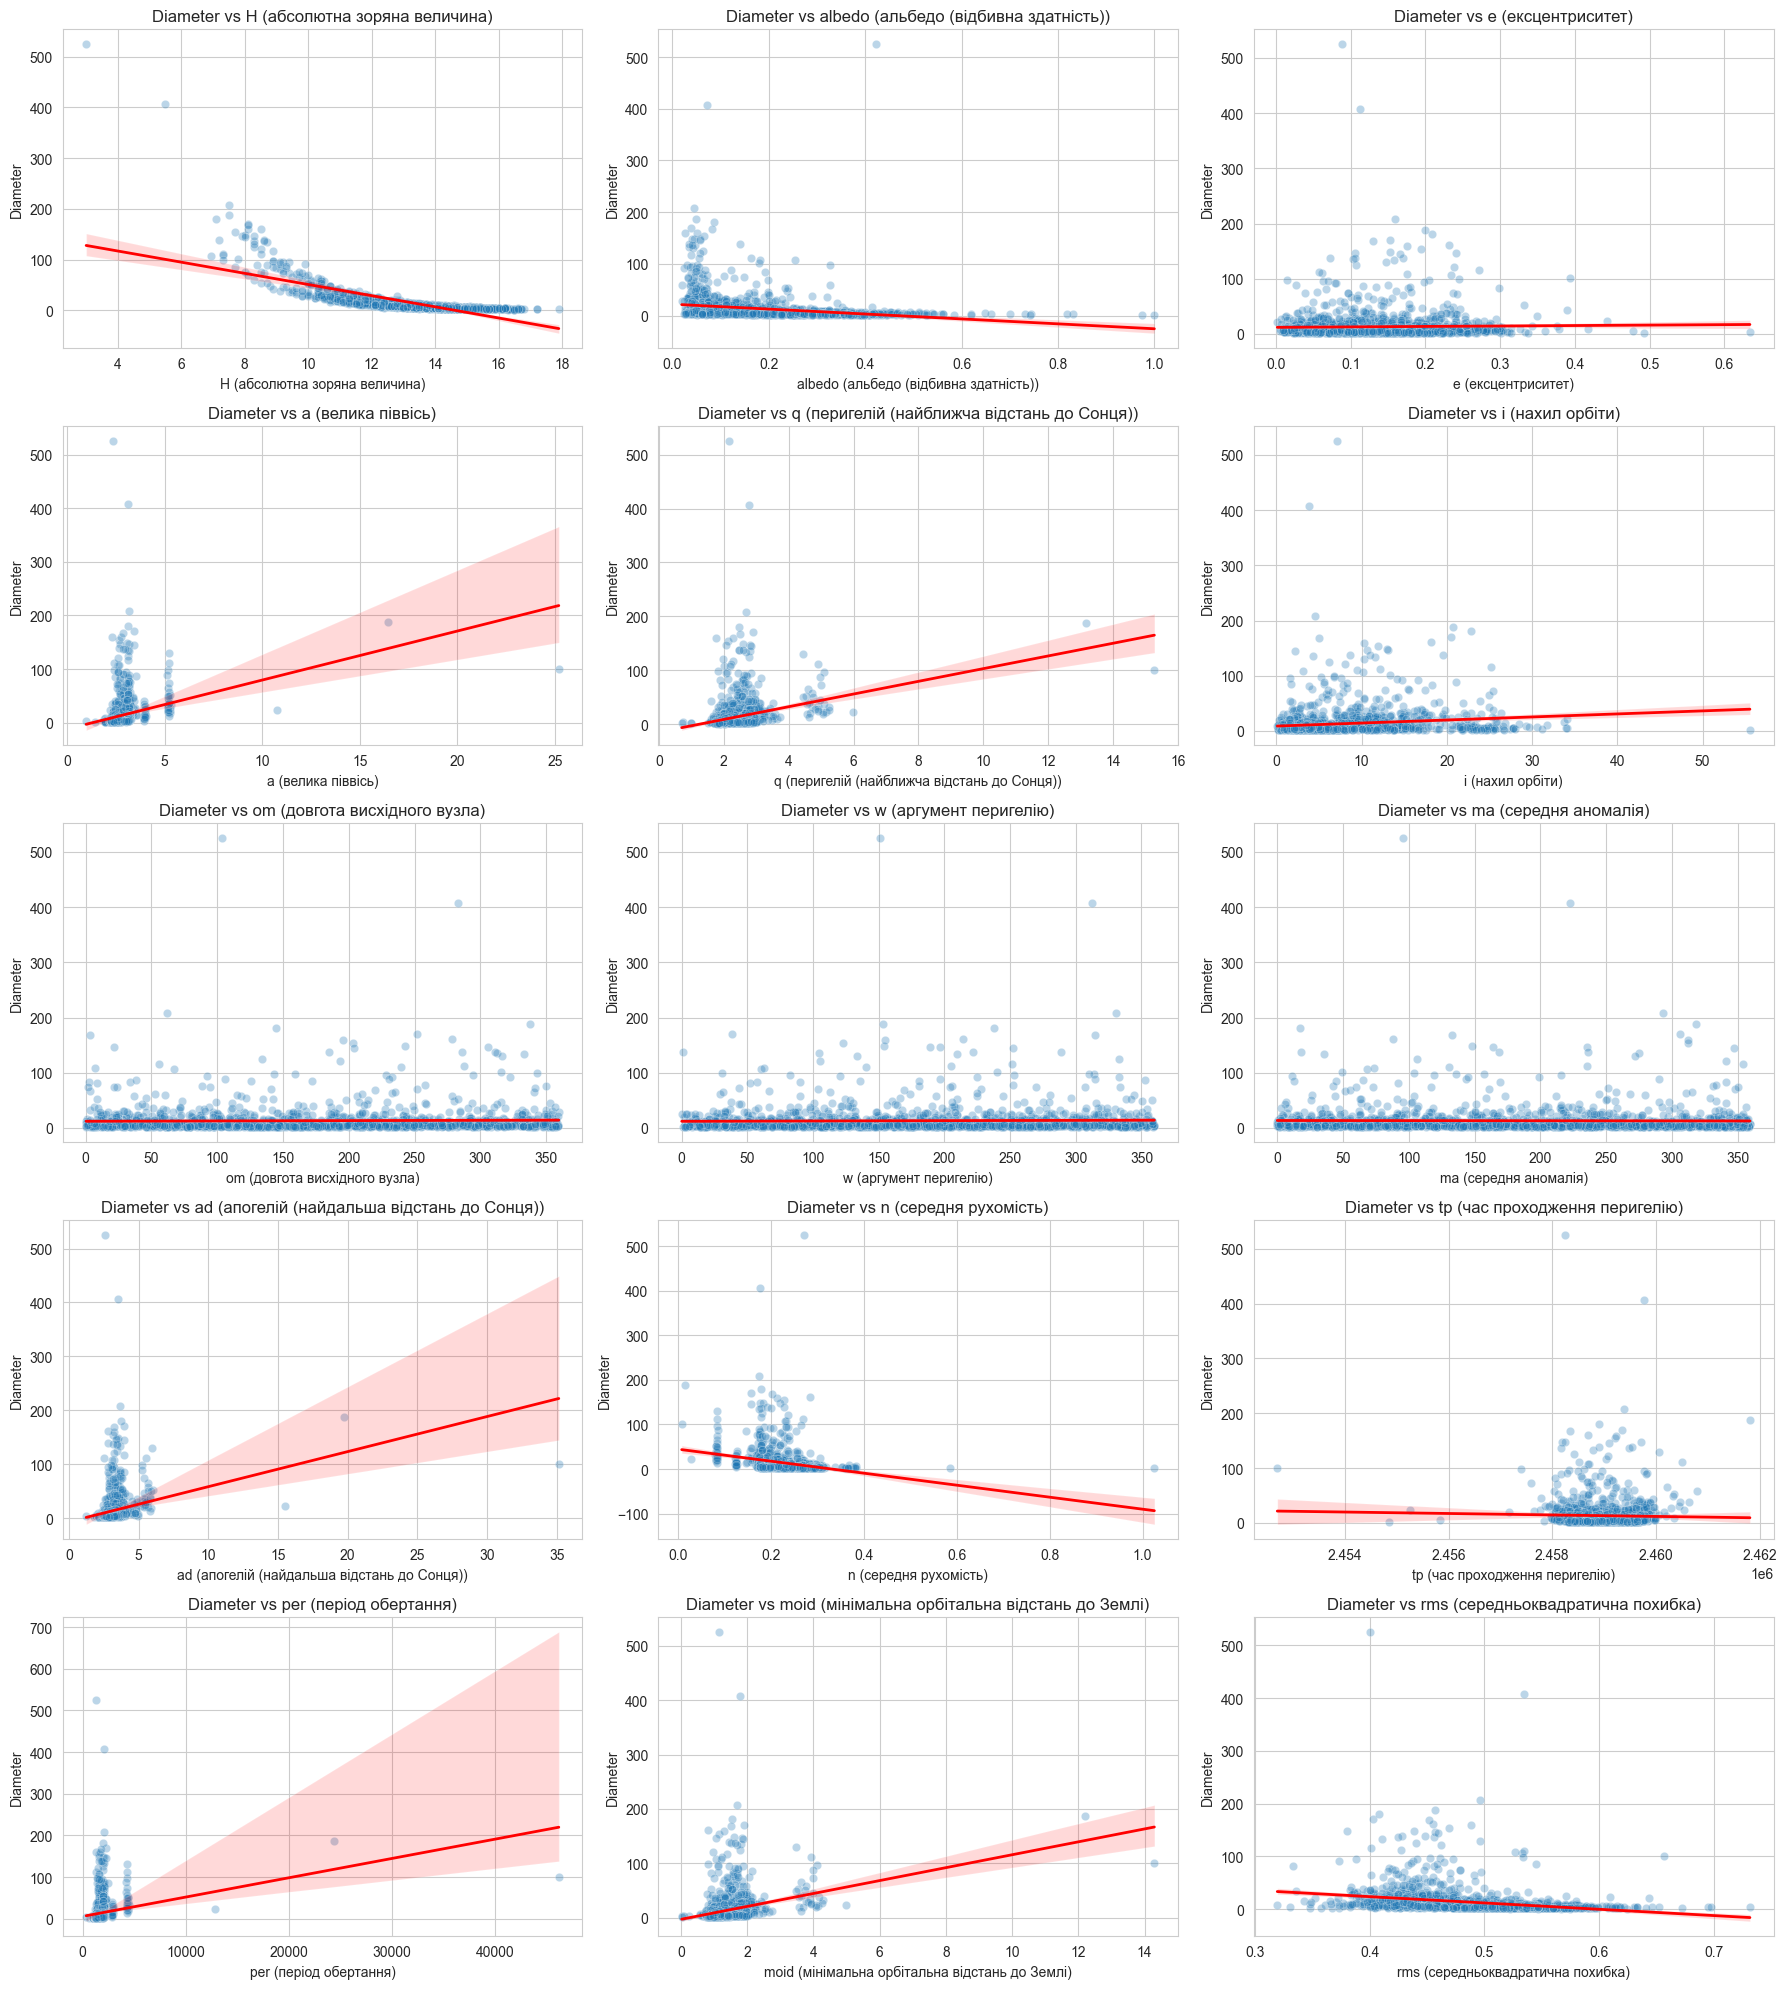

In [26]:

# Словник з характеристиками та їхніми описами українською
regression_features = {
    'H': 'абсолютна зоряна величина',
    'albedo': 'альбедо (відбивна здатність)',
    'e': 'ексцентриситет',
    'a': 'велика піввісь',
    'q': 'перигелій (найближча відстань до Сонця)',
    'i': 'нахил орбіти',
    'om': 'довгота висхідного вузла',
    'w': 'аргумент перигелію',
    'ma': 'середня аномалія',
    'ad': 'апогелій (найдальша відстань до Сонця)',
    'n': 'середня рухомість',
    'tp': 'час проходження перигелію',
    'per': 'період обертання',
    'moid': 'мінімальна орбітальна відстань до Землі',
    'rms': 'середньоквадратична похибка'
}

# Налаштування розміру фігури
plt.figure(figsize=(18, 20))
for i, (feature, description) in enumerate(regression_features.items(), 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(data=df, x=feature, y='diameter', alpha=0.3)
    sns.regplot(data=df, x=feature, y='diameter', scatter=False, color='red', line_kws={"linewidth": 2})
    plt.title(f'Diameter vs {feature} ({description})')
    plt.xlabel(f'{feature} ({description})')
    plt.ylabel('Diameter')

plt.tight_layout()
plt.show()

### Висновки з Scatter Plot для діаметра та основних характеристик

Розглядаючи точкові діаграми для діаметра астероїдів залежно від різних характеристик, можна зробити кілька спостережень:

1. **H (абсолютна зоряна величина)**:
   - Спостерігається зворотна залежність між зоряною величиною та діаметром. Більші діаметри мають менші значення H, що означає, що більші астероїди мають вищу яскравість (менше значення H відповідає яскравішому об'єкту).

2. **Albedo (альбедо)**:
   - Є деяка тенденція до зменшення діаметра при збільшенні альбедо. Це може свідчити про те, що яскравіші (відбивні) астероїди мають, в середньому, менші розміри.

3. **Equinox (екваторіальна система координат)**:
   - Ця характеристика виявляє мало інформації для аналізу, оскільки значення зосереджені навколо одного значення (J2000), що є стандартною системою координат для вимірювань.

4. **Орбітальні параметри (`a`, `e`, `q`, `i`, `om`, `w`)**:
   - **a (велика піввісь)**, **q (перигелій)**, **ad (апогелій)**: Більшість астероїдів мають діаметри в межах 0-100 км, незалежно від значень цих параметрів. Є кілька значень діаметра вище 100 км, але вони не демонструють чіткої залежності.
   - **e (ексцентриситет)**: Спостерігається слабка тенденція, за якою об'єкти з вищим ексцентриситетом можуть мати трохи менші діаметри, але ця залежність не є сильно вираженою.
   - **i (нахил орбіти)**, **om (довгота висхідного вузла)**, **w (аргумент перигелію)**: Ці параметри також не показують значної кореляції з діаметром.

5. **Ma (середня аномалія)**:
   - Значення діаметра розподілені рівномірно по всьому діапазону середньої аномалії. Схоже, що цей параметр мало впливає на діаметр.

6. **N (середня рухомість)**:
   - Спостерігається тенденція до того, що об'єкти з меншою середньою рухомістю мають більший діаметр. Проте діапазон значень рухомості дуже обмежений, тому висновки з цього параметра можуть бути обмеженими.

7. **Per (період обертання)**:
   - Є певна позитивна кореляція: об'єкти з більшим періодом обертання можуть мати більший діаметр. Це може вказувати на те, що великі астероїди обертаються повільніше.

8. **Moid (мінімальна орбітальна відстань до Землі)**:
   - Діаметр астероїда не демонструє значної залежності від мінімальної орбітальної відстані до Землі. 

9. **Rms (середньоквадратична похибка)**:
   - Спостерігається скупчення малих значень діаметра при низьких значеннях RMS, але чіткої залежності не виявлено.

### Загальний висновок
Загалом, більші астероїди мають менші значення H (вони яскравіші) та більші періоди обертання, але більшість інших параметрів не показують чіткої залежності з діаметром. Для кращого передбачення діаметра можливо буде необхідно використовувати комбінації змінних або більш складні нелінійні моделі, які можуть виявляти слабкі зв'язки.


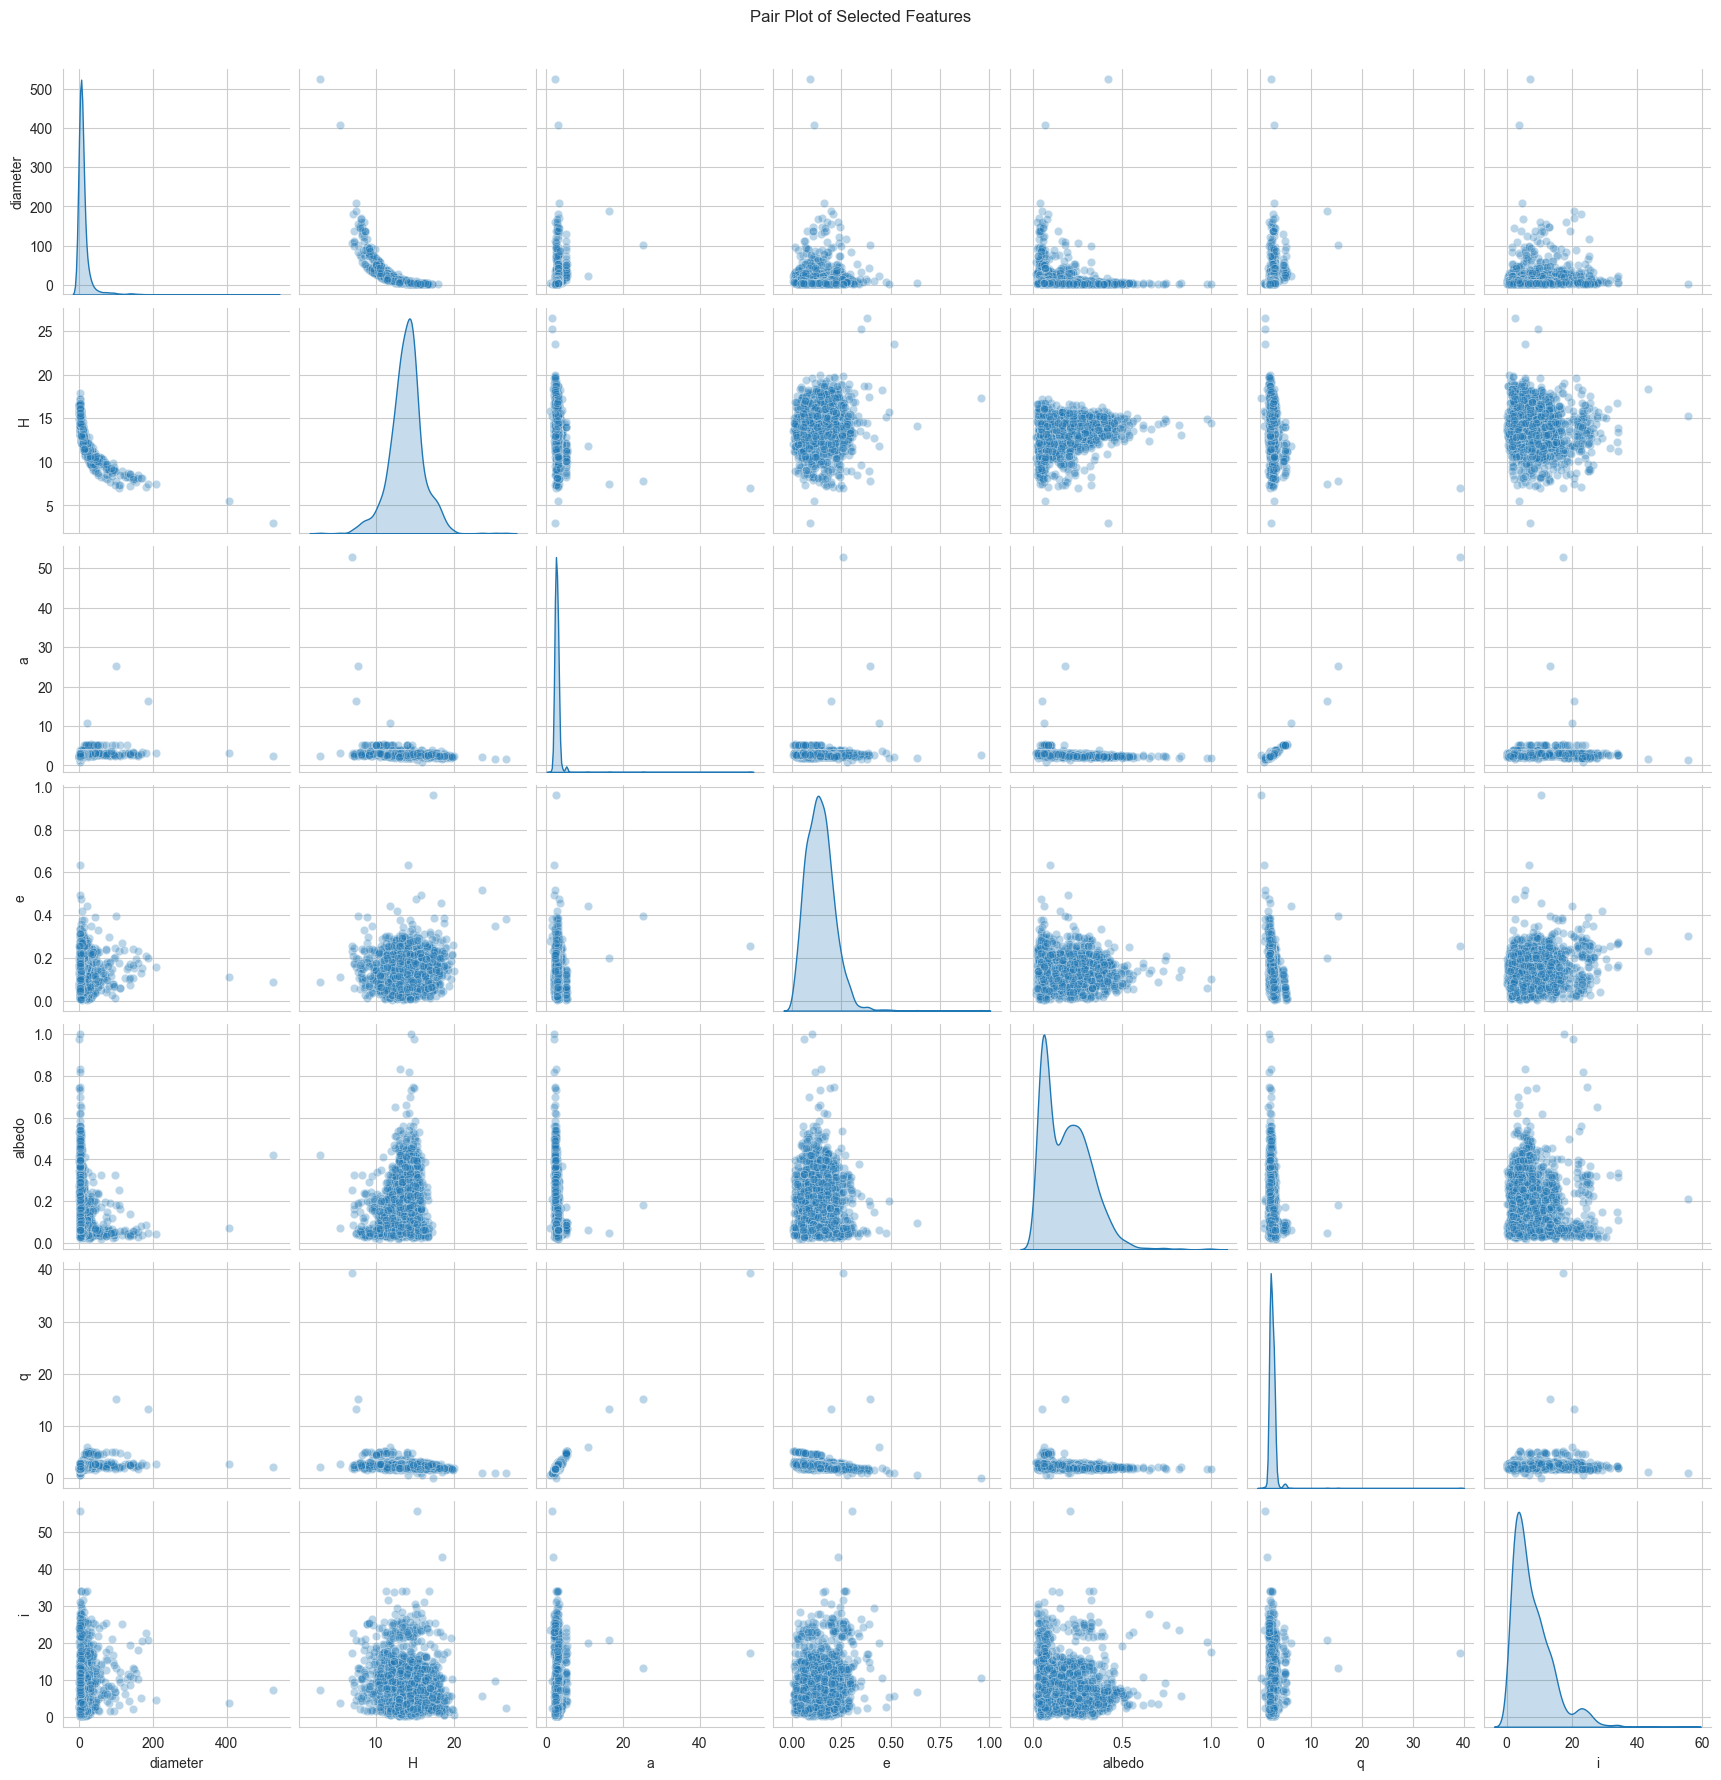

In [27]:
sns.pairplot(df[["diameter", "H", "a", "e", "albedo", "q", "i"]], diag_kind="kde", plot_kws={'alpha':0.3})
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


### Аналіз Pair Plot для вибраних характеристик

**Pair Plot** дозволяє візуально оцінити взаємозв'язок між діаметром астероїдів та іншими основними параметрами, такими як:
- **H** (абсолютна зоряна величина),
- **a** (велика піввісь),
- **e** (ексцентриситет),
- **albedo** (альбедо, відбивна здатність),
- **q** (перигелій, найближча відстань до Сонця),
- **i** (нахил орбіти).

#### Основні спостереження:

1. **Діаметр vs H (абсолютна зоряна величина)**:
   - Чітко видно негативну кореляцію. Більші астероїди мають менші значення H, тобто вони яскравіші, що підтверджує залежність між розміром і яскравістю.

2. **Діаметр vs Albedo (альбедо)**:
   - Діаметр астероїдів має тенденцію бути меншим при збільшенні альбедо. Це свідчить про те, що менші астероїди зазвичай мають вищу відбивну здатність, ймовірно, через свої властивості поверхні.

3. **Діаметр vs a (велика піввісь)**:
   - Немає чіткої кореляції між великою піввіссю та діаметром. Діаметри астероїдів, розташованих на різних відстанях від Сонця, розподілені рівномірно.

4. **Діаметр vs e (ексцентриситет)**:
   - Ексцентриситет також не має чіткої залежності від діаметра. Це може вказувати на те, що розмір астероїда не пов'язаний із формою його орбіти.

5. **Діаметр vs q (перигелій)**:
   - Більшість астероїдів мають невеликі значення перигелію (тобто вони проходять досить близько до Сонця), але залежність між діаметром і перигелієм також не є чітко вираженою.

6. **Діаметр vs i (нахил орбіти)**:
   - Нахил орбіти має незначний вплив на діаметр, більшість астероїдів незалежно від діаметра мають невеликі значення нахилу.

7. **Густинні діаграми на діагоналі**:
   - Густинні діаграми показують розподіл кожного параметра. Наприклад, більшість значень H знаходяться у межах 10-20, альбедо — в межах 0-0.3, і так далі. Це допомагає зрозуміти, як кожен параметр розподілений у вибірці.

### Загальний висновок:
- **Основні кореляції**: Найсильнішу кореляцію можна побачити між діаметром і абсолютною зоряною величиною (H), де менші значення H (більша яскравість) відповідають більшим астероїдам.
- **Відсутність кореляцій**: Для більшості інших параметрів, таких як велика піввісь, ексцентриситет, перигелій, нахил орбіти, чіткої кореляції з діаметром немає.
- **Розподіл**: Розподіли параметрів показують, що багато з них зосереджені навколо низьких значень, як, наприклад, для нахилу орбіти і альбедо.

Цей аналіз дозволяє зробити висновок, що діаметр астероїда може краще прогнозуватися з використанням зоряної величини (H) та альбедо, тоді як інші параметри мають менший вплив або не мають значної кореляції.


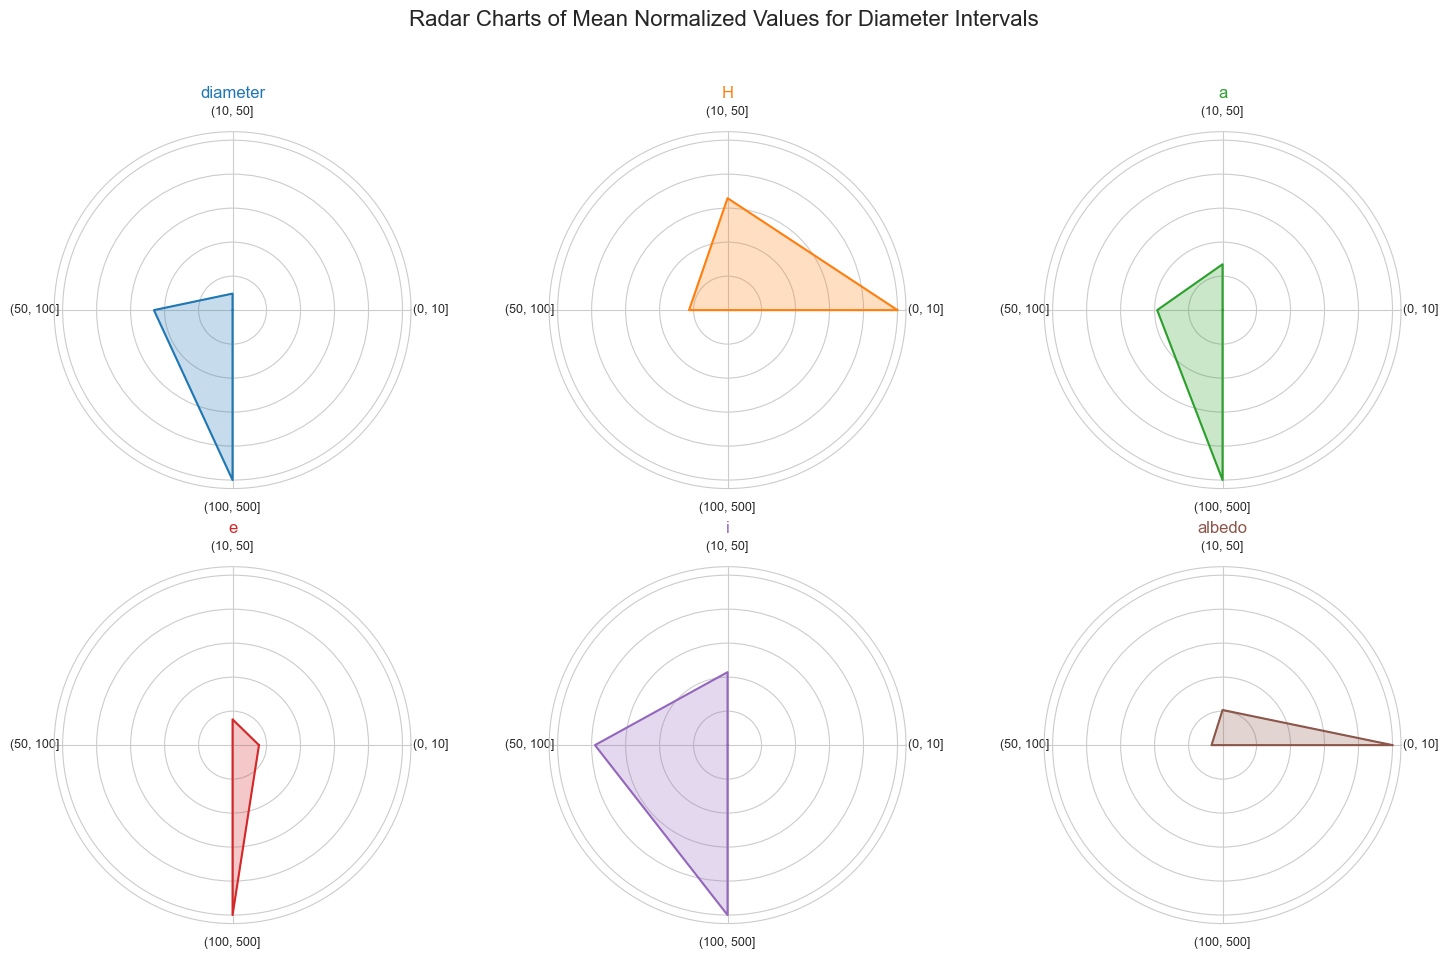

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler

# Вибір характеристик для аналізу
features = ["diameter", "H", "a", "e", "i", "albedo"]

# Підготовка даних: усереднене значення характеристик за інтервалами діаметра
df_radar = df[["diameter", "H", "a", "e", "i", "albedo"]].dropna()
df_radar = df_radar.groupby(pd.cut(df_radar["diameter"], bins=[0, 10, 50, 100, 500])).mean()

# Нормалізація значень для всіх характеристик
scaler = MinMaxScaler()
df_radar_scaled = pd.DataFrame(scaler.fit_transform(df_radar), columns=df_radar.columns, index=df_radar.index)

# Налаштування кольорів для кожної діаграми
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Параметри для сітки графіків
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10), subplot_kw=dict(polar=True))
fig.suptitle("Radar Charts of Mean Normalized Values for Diameter Intervals", fontsize=16)

# Побудова окремих радарних діаграм для кожної характеристики
for i, feature in enumerate(features):
    row, col = i // num_cols, i % num_cols
    ax = axes[row, col]

    # Підготовка даних для поточної характеристики
    categories = list(df_radar_scaled.index.astype(str))  # Інтервали діаметра
    values = df_radar_scaled[feature].tolist()  # Нормалізовані значення для обраної характеристики
    values += values[:1]  # Для замкнення графіку
    num_vars = len(categories)
    
    # Розрахунок кутів для кожної категорії
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]

    # Побудова радарної діаграми
    ax.plot(angles, values, color=colors[i], label=f"{feature} (normalized)")
    ax.fill(angles, values, color=colors[i], alpha=0.25)
    
    # Налаштування графіку
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_yticklabels([])
    ax.set_title(f"{feature}", fontsize=12, color=colors[i])

# Приховуємо пусті осі, якщо є
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



### Аналіз радарних діаграм середніх нормалізованих значень для інтервалів діаметра

У цих радарних діаграмах показані середні нормалізовані значення різних характеристик астероїдів для різних інтервалів діаметра (0-10, 10-50, 50-100, 100-500). Це дозволяє побачити, як певні характеристики змінюються залежно від розміру астероїдів.

### Опис окремих діаграм

1. **Diameter (Діаметр)**
   - Найбільше значення для астероїдів з діаметром 100-500.
   - Поступово збільшується зі збільшенням інтервалу діаметра.

2. **H (Абсолютна зоряна величина)**
   - Зі збільшенням діаметра астероїдів абсолютна зоряна величина зменшується, що свідчить про зворотну залежність між діаметром і яскравістю.
   - Найменші значення для великих астероїдів (100-500).

3. **a (Велика піввісь)**
   - Велика піввісь майже не змінюється для різних інтервалів діаметра.
   - Показує, що відстань до Сонця для астероїдів не має значного зв'язку з їх діаметром.

4. **e (Ексцентриситет)**
   - Незначне зростання ексцентриситету для астероїдів з більшим діаметром.
   - Це вказує на слабкий зв'язок між формою орбіти та розміром астероїда.

5. **i (Нахил орбіти)**
   - Нахил орбіти незначно змінюється для різних діаметрів.
   - Це означає, що нахил орбіти не сильно залежить від розміру астероїда.

6. **albedo (Альбедо)**
   - Значно вище для менших астероїдів (0-10), що вказує на їхню вищу відбивну здатність.
   - Зменшується для більших астероїдів, можливо, через зміну складу чи поверхневих характеристик.

### Висновки
- **Залежність альбедо від розміру:** Виявлено чітку тенденцію до зменшення альбедо зі збільшенням діаметра, що може бути пов'язано зі змінами в складі чи структурі поверхні великих астероїдів.
- **Абсолютна зоряна величина та діаметр:** Є зворотна залежність між H та діаметром — більші астероїди мають меншу абсолютну зоряну величину.
- **Інші характеристики:** Велика піввісь, ексцентриситет та нахил орбіти не показують значних змін зі збільшенням діаметра.

Ці радарні діаграми допомагають візуалізувати різні тенденції у характеристиках астероїдів залежно від їхнього розміру. Вони є корисним інструментом для подальшого дослідження зв'язків між параметрами орбіти та розміром астероїдів.


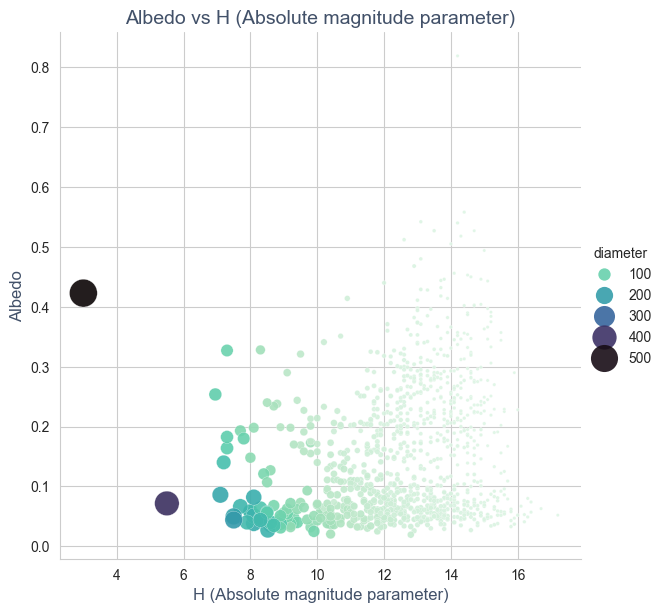

In [40]:

sns.set_style('whitegrid')

# Відбір половини даних для зручності візуалізації
df_sample = df.sample(frac=0.5, weights='diameter', random_state=1)

# Побудова графіка залежності Albedo від H з кольорами, що відповідають діаметру
sns.relplot(
    x="H", y="albedo", hue="diameter", size="diameter",
    sizes=(5, 400), alpha=0.9, palette="mako_r",
    height=6, data=df_sample, legend="brief"
)

# Налаштування підписів та заголовків
plt.title('Albedo vs H (Absolute magnitude parameter)', fontsize=14, color='#425169')
plt.xlabel('H (Absolute magnitude parameter)', fontsize=12, color='#425169')
plt.ylabel('Albedo', fontsize=12, color='#425169')
plt.show()

### Висновок

Графік показує залежність альбедо (відбивної здатності) від абсолютної зоряної величини (H) для астероїдів різного діаметру. Деякі ключові спостереження:

1. **Зменшення Альбедо з ростом H**:
   - На графіку видно, що зі збільшенням абсолютної зоряної величини (H) значення альбедо загалом зменшується. Це може свідчити про те, що об'єкти з високим H мають меншу відбивну здатність.

2. **Вплив діаметра**:
   - Розміри точок на графіку відповідають діаметру астероїда. Помітно, що астероїди більшого діаметру мають меншу абсолютну зоряну величину (нижче значення H) і часто мають більші значення альбедо. 

3. **Взаємозв'язок між діаметром, H та альбедо**:
   - Взаємозв'язок між діаметром, абсолютною зоряною величиною та альбедо є цікавим аспектом для подальшого дослідження. Більші астероїди можуть мати тенденцію до більшого альбедо, що вказує на їхні особливості поверхні або склад.

Отримані дані можуть бути використані для кращого розуміння фізичних властивостей астероїдів, а також для оцінки їхньої відбивної здатності залежно від розміру та яскравості.


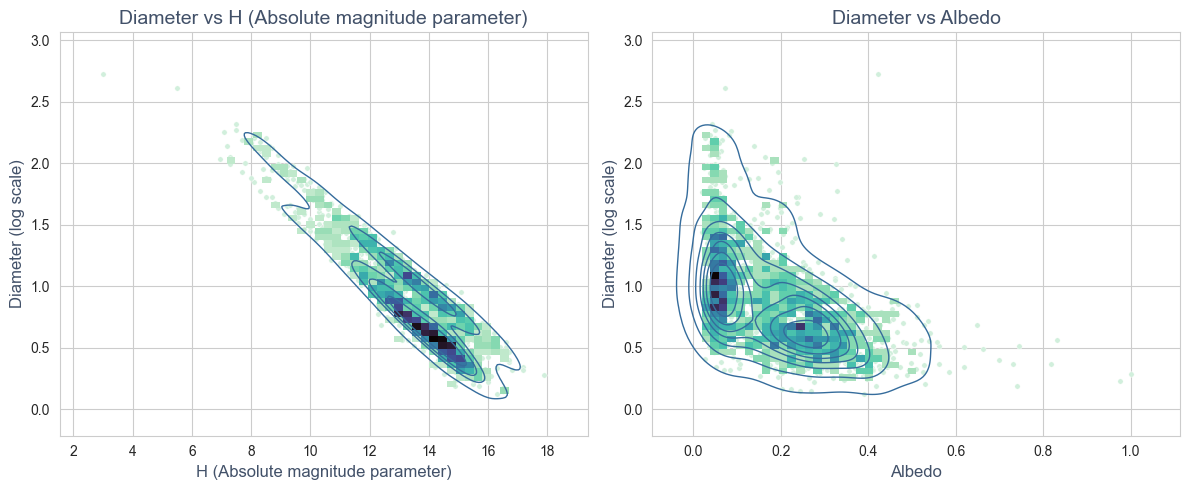

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Налаштування стилю графіка
sns.set_style('whitegrid')
plt.figure(figsize=(12, 5))

# Підграфік 1: Зв'язок між абсолютною зоряною величиною (H) та діаметром
plt.subplot(1, 2, 1)
sns.kdeplot(x='H', y=np.log10(df['diameter']), data=df, levels=5, color="#356c9c", linewidths=1)
sns.scatterplot(x='H', y=np.log10(df['diameter']), data=df, s=15, color="#d1efdc")
sns.histplot(x='H', y=np.log10(df['diameter']), data=df, bins=50, pthresh=.05, cmap='mako_r')

plt.title('Diameter vs H (Absolute magnitude parameter)', fontsize=14).set_color('#425169')
plt.xlabel('H (Absolute magnitude parameter)', fontsize=12).set_color('#425169')
plt.ylabel('Diameter (log scale)', fontsize=12).set_color('#425169')

# Підграфік 2: Зв'язок між альбедо та діаметром
plt.subplot(1, 2, 2)
sns.kdeplot(x='albedo', y=np.log10(df['diameter']), data=df, levels=8, color="#356c9c", linewidths=1)
sns.scatterplot(x='albedo', y=np.log10(df['diameter']), data=df, s=15, color="#d1efdc")
sns.histplot(x='albedo', y=np.log10(df['diameter']), data=df, bins=50, pthresh=.05, cmap='mako_r')

plt.title('Diameter vs Albedo', fontsize=14).set_color('#425169')
plt.xlabel('Albedo', fontsize=12).set_color('#425169')
plt.ylabel('Diameter (log scale)', fontsize=12).set_color('#425169')

plt.tight_layout()
plt.show()

### Аналіз графіків: Diameter vs H та Diameter vs Albedo

1. **Diameter vs H**:
   - Спостерігається негативна кореляція між абсолютною зоряною величиною \( H \) та діаметром: при збільшенні \( H \) діаметр зменшується.
   - Більші астероїди мають менші значення \( H \) (більш яскраві), тоді як менші астероїди – вищі значення \( H \).

2. **Diameter vs Albedo**:
   - Більші астероїди мають нижче альбедо, що вказує на їхню темнішу поверхню.
   - Основна маса даних зосереджена при альбедо від 0 до 0.2, де спостерігаються більші значення діаметра.

Ці тенденції можуть бути корисними для оцінки структури та складу астероїдів.

## Загальний висновок по аналізу діаметра астероїдів

### Загальний висновок по аналізу діаметра астероїдів

У цій частині роботи я проаналізував різні взаємозв’язки між діаметром астероїдів та їхніми характеристиками, зокрема абсолютною зоряною величиною \( H \), альбедо та орбітальними параметрами. За допомогою різних типів графіків (графіки розсіювання, контурні графіки, радіальні діаграми) я отримав декілька цікавих спостережень:

1. **Взаємозв’язок між діаметром та абсолютною зоряною величиною (H)**:
   - Спостерігається чітка негативна кореляція між абсолютною зоряною величиною \( H \) та діаметром астероїда. Зазвичай, астероїди з більшими діаметрами мають нижчі значення \( H \), що свідчить про їхню вищу яскравість. Це логічно, оскільки великі об’єкти відбивають більше світла, і вони здаються яскравішими.
   - Це відкриття допомогло мені зрозуміти, як розмір астероїда впливає на його видиму яскравість, що є важливим для подальших спостережень.

2. **Зв’язок між діаметром та альбедо**:
   - Альбедо показує відбивну здатність поверхні астероїда. Виявилося, що астероїди з нижчим альбедо зазвичай більші, тоді як високі значення альбедо характерні для менших об’єктів.
   - Мені здалося цікавим, що темніші поверхні, які краще поглинають світло, властиві більшим астероїдам. Це може свідчити про різний склад матеріалів, які впливають на розмір і відбивну здатність астероїдів.

3. **Вплив орбітальних параметрів**:
   - Орбітальні параметри, як-от ексцентриситет, велика піввісь та нахил орбіти, також мають певний вплив на діаметр астероїда, хоча цей зв’язок не настільки очевидний. Проте вони дають цінну інформацію про походження та еволюцію астероїдів у Сонячній системі.
   - Це допомогло мені поглибити розуміння структури та руху астероїдів, навіть якщо ці параметри не мають прямого зв'язку з розміром.

### Підсумок

Загалом, я дійшов висновку, що діаметр астероїда має тісний зв'язок з його абсолютною зоряною величиною та альбедо. Ці характеристики можна використовувати для оцінки розміру астероїда за допомогою астрономічних спостережень. Дослідження також показало, що орбітальні параметри можуть бути корисними для класифікації та прогнозування властивостей нових астероїдів.

Ця робота дала мені гарне розуміння того, як астероїди взаємодіють зі світлом і як їхні орбітальні та фізичні параметри можуть використовуватися для побудови прогнозних моделей. У майбутньому це стане основою для застосування методів машинного навчання, щоб точніше прогнозувати властивості астероїдів.
